In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import gmaps
import os
from scipy.stats import linregress
from IPython.display import display, HTML
from Config import google_key

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

#Pull in csv from total yearly rent vs. income
path = ("../output_data/rental(total)_income_merged.csv")
merged = pd.read_csv(path)
merged

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689
5,Colorado,19500.0,20400.0,21600.0,900.0,1200.0,68906,72084,74172,3178,2088
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776
7,Delaware,15600.0,15600.0,15600.0,0.0,0.0,59759,59294,62318,-465,3024
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874
9,Florida,19800.0,20280.0,20700.0,480.0,420.0,50518,52277,53681,1759,1404


In [9]:
#Add columns for lat and lng
merged["Lat"] = ""
merged["Lng"] = ""

#Google API to get lat and lng for all states
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

params = {"key": google_key}

for index, row in merged.iterrows():
    state = row["State"]
    params["address"] = state
    
    print(f"Retrieving results for Index {index}: {state}.")
    response = requests.get(base_url, params=params).json()
    results = response['results']
    
    try:
        merged.loc[index, "Lat"] = results[0]["geometry"]["location"]["lat"]
        merged.loc[index, "Lng"] = results[0]["geometry"]["location"]["lng"]
    except Exception as e:
        print("Missing field/result...skipping")
        pass
    print("---------------------")

Retrieving results for Index 0: Alabama.
---------------------
Retrieving results for Index 1: Alaska.
---------------------
Retrieving results for Index 2: Arizona.
---------------------
Retrieving results for Index 3: Arkansas.
---------------------
Retrieving results for Index 4: California.
---------------------
Retrieving results for Index 5: Colorado.
---------------------
Retrieving results for Index 6: Connecticut.
---------------------
Retrieving results for Index 7: Delaware.
---------------------
Retrieving results for Index 8: District of Columbia.
---------------------
Retrieving results for Index 9: Florida.
---------------------
Retrieving results for Index 10: Georgia.
---------------------
Retrieving results for Index 11: Hawaii.
---------------------
Retrieving results for Index 12: Idaho.
---------------------
Retrieving results for Index 13: Illinois.
---------------------
Retrieving results for Index 14: Indiana.
---------------------
Retrieving results for Index 1

In [10]:
merged.to_csv("../output_data/all_data_lat-lng.csv", index=False, header=True)
merged

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,Lat,Lng
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876,32.3182,-86.9023
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120,64.2008,-149.494
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797,34.0489,-111.094
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935,35.2011,-91.8318
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689,36.7783,-119.418
5,Colorado,19500.0,20400.0,21600.0,900.0,1200.0,68906,72084,74172,3178,2088,39.5501,-105.782
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776,41.6032,-73.0877
7,Delaware,15600.0,15600.0,15600.0,0.0,0.0,59759,59294,62318,-465,3024,38.9108,-75.5277
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874,38.9072,-77.0369
9,Florida,19800.0,20280.0,20700.0,480.0,420.0,50518,52277,53681,1759,1404,27.6648,-81.5158


In [11]:
#Find lowest 10 rental states in 2015
low_rent_15 = merged.sort_values("2015 Yearly Rent")
low_rent_15 = low_rent_15.reset_index(drop=True)
low_rent_15 = low_rent_15.truncate(before=0, after=9)
low_rent_15 = low_rent_15[["State", "2015 Yearly Rent", "2015 Income", "Lat", "Lng"]]
low_rent_15

,State,2015 Yearly Rent,2015 Income,Lat,Lng
0,Missouri,10740.0,61249,37.9643,-91.8318
1,Alabama,11400.0,46053,32.3182,-86.9023
2,Michigan,11550.0,56083,44.3148,-85.6024
3,Indiana,11700.0,53786,40.2672,-86.1349
4,Kentucky,11940.0,43857,37.8393,-84.27
5,Idaho,11940.0,53414,44.0682,-114.742
6,Arkansas,12000.0,44282,35.2011,-91.8318
7,Mississippi,12000.0,41426,32.3547,-89.3985
8,Montana,12000.0,53177,46.8797,-110.363
9,Ohio,12000.0,55150,40.4173,-82.9071


In [12]:
#Find lowest 10 income states in 2015
low_income_15 = merged.sort_values("2015 Income")
low_income_15 = low_income_15.reset_index(drop=True)
low_income_15 = low_income_15.truncate(before=0, after=9)
low_income_15 = low_income_15[["State", "2015 Yearly Rent", "2015 Income", "Lat", "Lng"]]
low_income_15

,State,2015 Yearly Rent,2015 Income,Lat,Lng
0,Mississippi,12000.0,41426,32.3547,-89.3985
1,Kentucky,11940.0,43857,37.8393,-84.27
2,Arkansas,12000.0,44282,35.2011,-91.8318
3,West Virginia,13200.0,44309,38.5976,-80.4549
4,Alabama,11400.0,46053,32.3182,-86.9023
5,New Mexico,13350.0,46684,34.5199,-105.87
6,Louisiana,14700.0,47515,30.9843,-91.9623
7,South Carolina,14400.0,47968,33.8361,-81.1637
8,Oklahoma,13200.0,48710,35.4676,-97.5164
9,Tennessee,13200.0,48971,35.5175,-86.5804


In [13]:
#Configure those maps
gmaps.configure(api_key=google_key)

#Make heat map of low '15 rent
locations = low_rent_15[["Lat", "Lng"]]
rent = low_rent_15["2015 Yearly Rent"]
fig = gmaps.figure()

heatmap_layer_rent = gmaps.heatmap_layer(locations, weights=rent, dissipating=False,
                                          max_intensity=(max(rent)),
                                          point_radius=2)
fig.add_layer(heatmap_layer_rent)

#Make heat map of low '15 income - need to figure out how to make it a diff. color
#Made them symbols for now
states_income = low_income_15[["Lat", "Lng"]]
income = low_income_15["2015 Income"].astype(float)

symbol_layer_income = gmaps.symbol_layer(locations=states_income, fill_color='rgba(0, 150, 0, 0.4)', 
                                         stroke_color='rgba(0, 0, 150, 0.4)', scale=5)

fig.add_layer(symbol_layer_income)

fig

#Map looks pretty lame, should probably find another way of showing the data

Figure(layout=FigureLayout(height='420px'))

In [14]:
#Find lowest 10 rental states in 2016
low_rent_16 = merged.sort_values("2016 Yearly Rent")
low_rent_16 = low_rent_16.reset_index(drop=True)
low_rent_16 = low_rent_16.truncate(before=0, after=9)
low_rent_16 = low_rent_16[["State", "2016 Yearly Rent", "2016 Income", "Lat", "Lng"]]
low_rent_16

,State,2016 Yearly Rent,2016 Income,Lat,Lng
0,Missouri,11100.0,56199,37.9643,-91.8318
1,Alabama,11700.0,48237,32.3182,-86.9023
2,Indiana,11970.0,57300,40.2672,-86.1349
3,Kentucky,11994.0,46345,37.8393,-84.27
4,Arkansas,12000.0,46894,35.2011,-91.8318
5,Michigan,12000.0,58319,44.3148,-85.6024
6,Ohio,12450.0,55146,40.4173,-82.9071
7,Mississippi,12450.0,41983,32.3547,-89.3985
8,West Virginia,12600.0,45308,38.5976,-80.4549
9,Oklahoma,12600.0,52039,35.4676,-97.5164


In [15]:
#Find lowest 10 income states in 2016
low_income_16 = merged.sort_values("2016 Income")
low_income_16 = low_income_16.reset_index(drop=True)
low_income_16 = low_income_16.truncate(before=0, after=9)
low_income_16 = low_income_16[["State", "2016 Yearly Rent", "2016 Income", "Lat", "Lng"]]
low_income_16

,State,2016 Yearly Rent,2016 Income,Lat,Lng
0,Mississippi,12450.0,41983,32.3547,-89.3985
1,Louisiana,14400.0,43103,30.9843,-91.9623
2,West Virginia,12600.0,45308,38.5976,-80.4549
3,Kentucky,11994.0,46345,37.8393,-84.27
4,Arkansas,12000.0,46894,35.2011,-91.8318
5,Alabama,11700.0,48237,32.3182,-86.9023
6,New Mexico,13770.0,49493,34.5199,-105.87
7,Maine,17100.0,51950,45.2538,-69.4455
8,Oklahoma,12600.0,52039,35.4676,-97.5164
9,Florida,20280.0,52277,27.6648,-81.5158


In [16]:
#Make heat map of low '16 rent
locations = low_rent_16[["Lat", "Lng"]]
rent = low_rent_16["2016 Yearly Rent"]
fig_2 = gmaps.figure()

heatmap_layer_rent = gmaps.heatmap_layer(locations, weights=rent, dissipating=False,
                                          max_intensity=(max(rent)),
                                          point_radius=2)
fig_2.add_layer(heatmap_layer_rent)

#Make heat map of low '15 income - need to figure out how to make it a diff. color
#Made them symbols for now
states_income = low_income_16[["Lat", "Lng"]]
income = low_income_16["2016 Income"].astype(float)

symbol_layer_income = gmaps.symbol_layer(locations=states_income, fill_color='rgba(0, 150, 0, 0.4)', 
                                         stroke_color='rgba(0, 0, 150, 0.4)', scale=5)

fig_2.add_layer(symbol_layer_income)

fig_2


Figure(layout=FigureLayout(height='420px'))

In [17]:
#Find lowest 10 rental states in 2017
low_rent_17 = merged.sort_values("2017 Yearly Rent")
low_rent_17 = low_rent_17.reset_index(drop=True)
low_rent_17 = low_rent_17.truncate(before=0, after=9)
low_rent_17 = low_rent_17[["State", "2017 Yearly Rent", "2017 Income", "Lat", "Lng"]]
low_rent_17

,State,2017 Yearly Rent,2017 Income,Lat,Lng
0,Missouri,11400.0,56885,37.9643,-91.8318
1,Alabama,11970.0,51113,32.3182,-86.9023
2,West Virginia,12000.0,45392,38.5976,-80.4549
3,Oklahoma,12294.0,55006,35.4676,-97.5164
4,Ohio,12450.0,59768,40.4173,-82.9071
5,Indiana,12570.0,58873,40.2672,-86.1349
6,Arkansas,12600.0,48829,35.2011,-91.8318
7,Wyoming,12900.0,57837,43.076,-107.29
8,Iowa,12960.0,63481,41.878,-93.0977
9,Kentucky,13020.0,51348,37.8393,-84.27


In [18]:
#Find lowest 10 income states in 2017
low_income_17 = merged.sort_values("2017 Income")
low_income_17 = low_income_17.reset_index(drop=True)
low_income_17 = low_income_17.truncate(before=0, after=9)
low_income_17 = low_income_17[["State", "2017 Yearly Rent", "2017 Income", "Lat", "Lng"]]
low_income_17

,State,2017 Yearly Rent,2017 Income,Lat,Lng
0,Mississippi,13200.0,43441,32.3547,-89.3985
1,Louisiana,15000.0,43903,30.9843,-91.9623
2,West Virginia,12000.0,45392,38.5976,-80.4549
3,New Mexico,14340.0,47855,34.5199,-105.87
4,Arkansas,12600.0,48829,35.2011,-91.8318
5,North Carolina,15000.0,50343,35.7596,-79.0193
6,Alabama,11970.0,51113,32.3182,-86.9023
7,Kentucky,13020.0,51348,37.8393,-84.27
8,Maine,20100.0,51664,45.2538,-69.4455
9,Florida,20700.0,53681,27.6648,-81.5158


In [19]:
#Make heat map of low '17 rent
locations = low_rent_17[["Lat", "Lng"]]
rent = low_rent_17["2017 Yearly Rent"]
fig_3 = gmaps.figure()

heatmap_layer_rent = gmaps.heatmap_layer(locations, weights=rent, dissipating=False,
                                          max_intensity=(max(rent)),
                                          point_radius=2)
fig_3.add_layer(heatmap_layer_rent)

#Make heat map of low '15 income - need to figure out how to make it a diff. color
#Made them symbols for now
states_income = low_income_17[["Lat", "Lng"]]
income = low_income_17["2017 Income"].astype(float)

symbol_layer_income = gmaps.symbol_layer(locations=states_income, fill_color='rgba(0, 150, 0, 0.4)', 
                                         stroke_color='rgba(0, 0, 150, 0.4)', scale=5)

fig_3.add_layer(symbol_layer_income)

fig_3


Figure(layout=FigureLayout(height='420px'))

In [20]:
#Find % of income spent on rent each year
spending = merged[["State"]]
spending["'15 % of Income on Rent"] = (merged["2015 Yearly Rent"] / merged["2015 Income"] * 100).map("{:.2f}%".format)
spending["'16 % of Income on Rent"] = (merged["2016 Yearly Rent"] / merged["2016 Income"] * 100).map("{:.2f}%".format)
spending["'17 % of Income on Rent"] = (merged["2017 Yearly Rent"] / merged["2017 Income"] * 100).map("{:.2f}%".format)

spending.to_csv("../output_data/spending_on_rent.csv", index=False, header=True)
spending                                                 

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,State,'15 % of Income on Rent,'16 % of Income on Rent,'17 % of Income on Rent
0,Alabama,24.75%,24.26%,23.42%
1,Alaska,25.98%,25.60%,26.54%
2,Arizona,27.19%,25.72%,26.50%
3,Arkansas,27.10%,25.59%,25.80%
4,California,41.78%,42.22%,45.16%
5,Colorado,28.30%,28.30%,29.12%
6,Connecticut,27.85%,26.30%,28.85%
7,Delaware,26.10%,26.31%,25.03%
8,District of Columbia,41.38%,41.79%,37.42%
9,Florida,39.19%,38.79%,38.56%


The r-squared: 0.5589543491674024


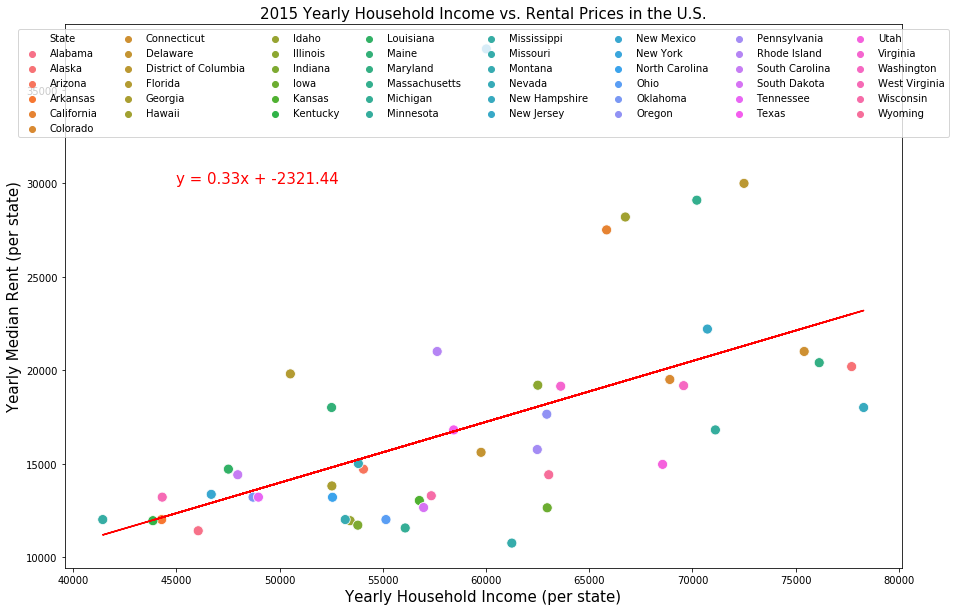

In [49]:
#Linear regression of all states 2015 (rent vs income)
x_values = merged["2015 Income"].astype('float')
y_values = merged["2015 Yearly Rent"].astype('float')
states = merged["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, marker="o", hue=states, s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45000,30000),fontsize=15,color="red")
plt.xlabel('Yearly Household Income (per state)', fontsize=15)
plt.ylabel('Yearly Median Rent (per state)', fontsize=15)
plt.title("2015 Yearly Household Income vs. Rental Prices in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=8)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2015_income_vs_rent.png")
plt.show()

The r-squared: 0.6121516773857695


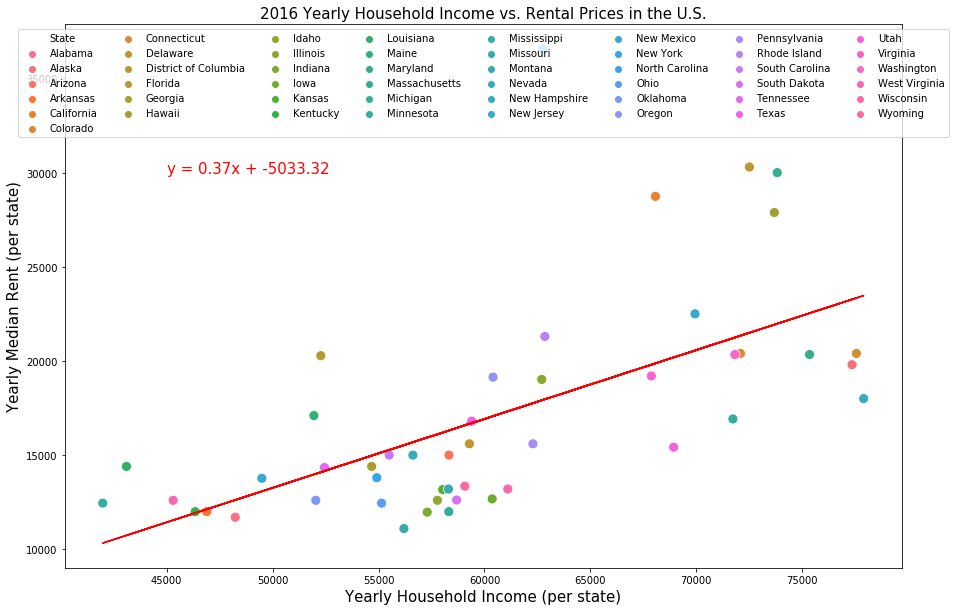

In [47]:
#Linear regression of all states 2016 (rent vs income)
x_values = merged["2016 Income"].astype('float')
y_values = merged["2016 Yearly Rent"].astype('float')
states = merged["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, marker="o", hue=states, s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45000,30000),fontsize=15,color="red")
plt.xlabel('Yearly Household Income (per state)', fontsize=15)
plt.ylabel('Yearly Median Rent (per state)', fontsize=15)
plt.title("2016 Yearly Household Income vs. Rental Prices in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=8)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2016_income_vs_rent.png")
plt.show()

The r-squared: 0.6124101323327278


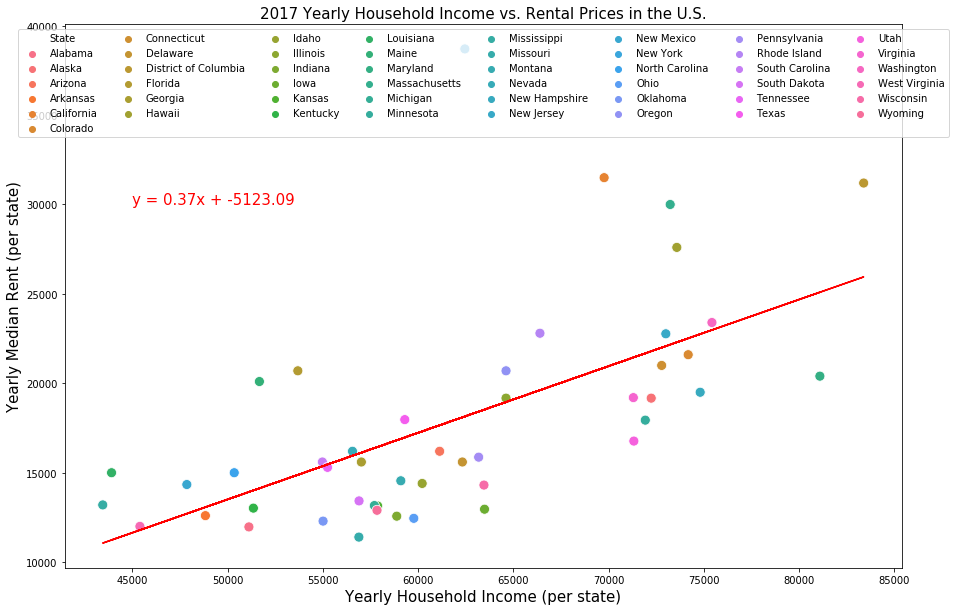

In [48]:
#Linear regression of all states 2015 (rent vs income)
x_values = merged["2017 Income"].astype('float')
y_values = merged["2017 Yearly Rent"].astype('float')
states = merged["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, marker="o", hue=states, s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45000,30000),fontsize=15,color="red")
plt.xlabel('Yearly Household Income (per state)', fontsize=15)
plt.ylabel('Yearly Median Rent (per state)', fontsize=15)
plt.title("2017 Yearly Household Income vs. Rental Prices in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=8)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2017_income_vs_rent.png")
plt.show()